<a href="https://colab.research.google.com/github/zangatec/4052_team9/blob/main/Partir%20por%20analisis%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maestria en Inteligencia Artificial Aplicada

Ciencia y Analítica de Datos

Dr. Jobish Vallikavungal

Alumno: Pedro Ulises Meléndez Ortega

Matricula: 00716301

11 octubre 2022

Reducción de dimensionalidad utlizando Principal Component Analysis (PCA)

In [ ]:
import pandas as pd
import numpy as np

# Principal components analysis (PCA)

* It is a useful method for dimension reduction, especially when the number of variables is large.
* PCA is intended for use with numerical variables.
   * For categorical variables, other methods such as correspondence analysis are more suitable.

In [ ]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
dfdescargado = pd.read_csv(url,index_col=0 )
dfdescargado.index.name=None
dfraw = dfdescargado.copy()
dfraw


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Nuestro set es de 30 mil registros y 25 columnas

In [ ]:
dfraw.shape

(30000, 24)

Vamos a revisar si es necesario descartar algo previamente. Aprovecharemos el ejercicio de la semana pasada para descartar de una vez los valores nulos, los cuales eliminarán el 0.14% de los datos

In [ ]:
dfraw.isnull().values.any()

True

In [ ]:
print('NaN occurrences in DataFrame:')
print(dfraw.isnull().sum().sum())

NaN occurrences in DataFrame:
196


In [ ]:
dflisto = dfraw.copy()
dflisto.dropna(inplace=True)
dflisto

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Veamos la correlación

In [ ]:
dflisto.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,-0.249340,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
X2,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,-0.054319,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
X3,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,0.097220,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
X4,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,0.035360,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
X5,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,-0.054006,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
X6,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,0.509783,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
X7,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,0.622990,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
X8,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,0.686447,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
X9,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,0.819655,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037
X10,-0.249340,-0.054319,0.097220,0.035360,-0.054006,0.509783,0.622990,0.686447,0.819655,1.000000,...,0.272062,0.269916,0.262614,-0.006199,-0.003139,0.009061,-0.058267,-0.033325,-0.022982,0.204549


Podemos ver que las variables con mayor correlación respecto al pago del credito Y es el retraso en el pago de los mismos, el cual se encuentra en X6. Veamos las varianzas respecto a este par de variables seleccionadas

Vamos a obtener los promedios de la variable, las varianzas y porcentajes reciprocos de variabilidad

In [ ]:
dflisto.X6.mean().round(2)

-0.02

In [ ]:
dflisto.X7.mean().round(2)

-0.13

In [ ]:
varianza = np.cov([dflisto.X6,dflisto.X7])
dfvarianza = pd.DataFrame(varianza, columns=['X6','X7'])
dfvarianza

,X6,X7
0,1.263351,0.904638
1,0.904638,1.433218


In [ ]:
dfcortado = dflisto[['X6','X7']]
dfcortado.var().sum()

2.6965691236237816

In [ ]:
t= dfcortado.var().sum()
varX6 =varianza[0][0]
varX7 =varianza[1][1]

In [ ]:
print('Varianza total \t\t\t:', t.round(2) )
print('Varianza de X6 \t:', ((varX6/t)*100).round(2),'%' )
print('Varianza de X7 \t:', ((varX7/t)*100).round(2),'%' )

Varianza total 			: 2.7
Varianza de X6 	: 46.85 %
Varianza de X7 	: 53.15 %


Si se descarta X6 (estado de los últimos pagos) peredemos el 46.85% de la variabilidad total

In [ ]:
dfcortado.corr().round(2)

,X6,X7
X6,1.00,0.67
X7,0.67,1.00


Se puede observar que estas dos variables contienen información redundante porque su variabilidad esta relacionada en un 67%. Ahora se buscará la receta (combinación lineal) de estas variables para poder reemplazarlas por 1 mediante los componentes principales

La línea z1 PC1 es la línea en la que la suma de las distancias al cuadrado es la mayor, es decir, la línea que tiene la mayor variabilidad entre las variables.

Z2 o PC2 es perpendicular (ortogonal) a esta línea pasando por el centro (cero)

In [ ]:
import seaborn as sns

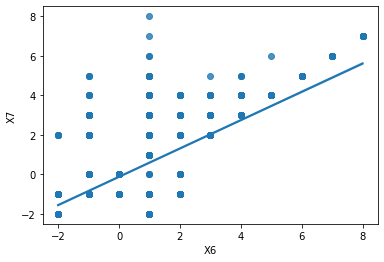

In [ ]:
p = sns.regplot(data = dflisto,
                x = dflisto.X6,
                y = dflisto.X7
               )
p

La receta de z1 es (0.6732, 0.7394): Significa que cuando x se mueve 0.6732, el eje y se mueve 0.7394 en la línea de regresión.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA(n_components=2)

pcs.fit(dflisto[['X6', 'X7']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.502299,0.836953,0.836953
1,0.663075,0.163047,1.000000


In [ ]:
pcs.components_.round(4)

array([[ 0.6732,  0.7394],
       [-0.7394,  0.6732]])

In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,1.50,0.66
Proportion of variance,0.84,0.16
Cumulative proportion,0.84,1.00


In [ ]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,1.5023,0.6631
Proportion of variance,0.8370,0.1630
Cumulative proportion,0.8370,1.0000


Con estas líneas vemos lo siguiente:
* `z1` es responsable del 83.70% de la variabilidad total y
* `z2` como es perpendicular a z1, mide la variabilidad en el orden del 16.30% restante.

Si descartaramos PC2, mantendriamos el 83.70% de la variabilidad


### Scree Plot

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

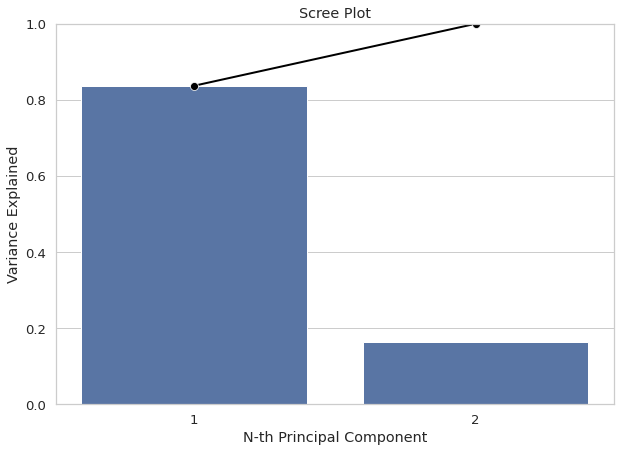

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

El primeri PC1 (Principal Component 1) tiene la suma del cuadrado de las distancias  por lo tanto la mayor variabilidad que puede haber entre las metricas.

Las lineas subsecuentes o PC2, PC3, PCn tambipén tienen la maxima varianza posible (la suma distancia puntos) pero siempre serán perpendiculares respecto a la antecesora.

In [ ]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.6732,  0.7394],
       [-0.7394,  0.6732]])

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns=['PC1', 'PC2'],
                                index=['X6', 'X7']
                                )
pcsComponents_df

,PC1,PC2
X6,0.673248,-0.739417
X7,0.739417,0.673248


La primera columna nos da los vectores del componente principal 1 (PC1), el termino es los coeficientes de la combinación lineal pero es como si fuera la pendiente m del vector que tiene la suma mas grande de las distancias al cuadrado entre los puntos.

> La segunda columna nos da los coeficientes de la combinación lineal de PC2 o z2, es perpendicular a z1.

Los pesos o weights se usan para calcular los los PC (principal components). Los "pesos" se usan para calcular los puntajes o scores de los componentes principales. Estos son los valores proyectados de X6 y X7 (en este caso si hubo atraso o no en los últimos pagos del credito) en los nuevos ejes quitando el promedio

El promedio de X6 es -0.02 y el promedio de X7 es -0.13


* La primera columna es la proyección de z1 usando los weights (0.6732, 0.7394).

    * La segunda columna es la proyección de z2 usando los pesos (-0.7394,  0.6732).
    
Ejemplo:  

Primero hay que centrar los puntos
(2 − `-0.02`)   & (2 − `-0.13`)

Después hay que multiplicar por los PC (principal components)
El primer cliente (con 2.0 en X6 y 2.0 en X7) es
$$( 0.6732)(2 + 0.02) + (0.7394)(2.0 + 0.13) = 2.935955$$
$$ Z_i = a_{i1} (X_1 - \bar{X_1}) + a_{i2} (X_2 - \bar{X_2}) + \cdots + a_{in} (X_n - \bar{X_n}) ; i = 1, 2, 3, \cdots n$$

In [ ]:
scores = pd.DataFrame(pcs.transform(dflisto[['X6', 'X7']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,2.935955,-0.054772
1,0.916213,2.163480
2,0.110626,0.077568
3,0.110626,0.077568
4,-0.562622,0.816985


In [ ]:
x = (0.673248)*(2+0.02)+(0.7394)*(2+0.13)

y = (-0.7394)*(2+0.02)+(0.6732)*(2+0.13)

In [ ]:
print('For the PC1\n \t x = ', x, '\n\t y = ', y)

For the PC1
 	 x =  2.9348829599999995 
	 y =  -0.05967199999999995


In [ ]:
scores.x.mean()

9.297441498696818e-17

In [ ]:
scores.y.sum()

-1.4921397450962104e-12

La suma de las varianzas `var(z1) + var(z2)` es igual a la suma de las varianzas de los variables originales , `var(X6) + var(X7)`.  

In [ ]:
scores.x.var() + scores.y.var()

2.696569123623782

In [ ]:
dflisto.X6.var() + dflisto.X7.var()

2.6965691236237816

In [ ]:
((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100).round(0)

84.0

In [ ]:
pcs = PCA()
pcs.fit(dflisto.iloc[:, :].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Standard deviation,166585.075260,115824.701663,37256.816553,27747.103019,20698.682257,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,...,2.065345e+00,9.413389e-01,7.532317e-01,7.323993e-01,5.964295e-01,5.121880e-01,4.940249e-01,4.598526e-01,4.185801e-01,3.855220e-01
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,...,9.385326e-11,1.949648e-11,1.248307e-11,1.180212e-11,7.826770e-12,5.771956e-12,5.369847e-12,4.652663e-12,3.854974e-12,3.270112e-12
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Scree Plot

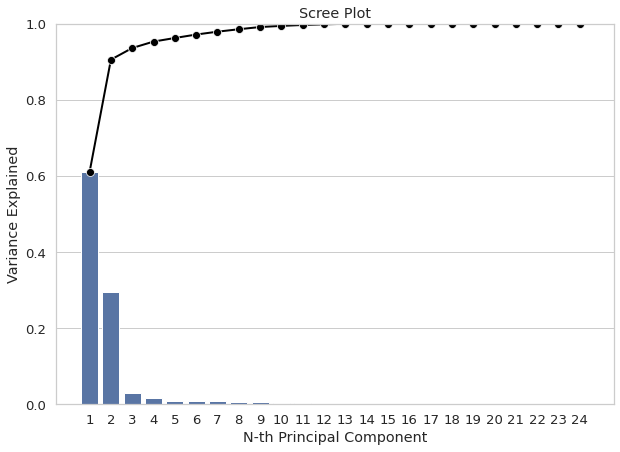

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Los primeros 3 componentes involucran el 94% de de la variación total asociada con todas las variables originales.

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

94.0

Los primeros 3 PC (principal components) abarcan el 90.57% de toda la variación.

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][1])*100).round(2)

90.57

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,...,2.0653,0.9413,0.7532,0.7324,0.5964,0.5122,0.494,0.4599,0.4186,0.3855
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000


In [ ]:
pcs.components_

array([[ 4.91051249e-01, -3.60183560e-08, -3.66863368e-07,
        -1.91693911e-07,  5.56462827e-06,  3.44159275e-07,
         5.70426106e-07,  5.84697827e-07,  6.67552613e-07,
         7.61271023e-07,  8.37911287e-07,  3.88614777e-01,
         3.81500219e-01,  3.72316835e-01,  3.46509376e-01,
         3.23011793e-01,  3.08673561e-01,  2.65507164e-02,
         3.12770650e-02,  2.68070179e-02,  2.21621169e-02,
         2.21853695e-02,  2.48009681e-02, -1.75568751e-07],
       [ 8.69327754e-01,  1.73905429e-07, -1.49968009e-06,
        -4.00325888e-07,  8.29040076e-06, -3.80425812e-06,
        -4.62046631e-06, -4.49870552e-06, -4.25800662e-06,
        -4.02895450e-06, -3.98194484e-06, -2.21093578e-01,
        -2.26152724e-01, -2.16301840e-01, -1.93842429e-01,
        -1.76598449e-01, -1.67159508e-01,  5.71363887e-03,
         1.08089432e-02,  1.09872540e-02,  1.03870690e-02,
         1.16983563e-02,  1.53688818e-02, -5.07109675e-07],
       [-2.05568405e-02,  3.26050600e-07, -9.71580370e

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = dflisto.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
X1,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02,-4.412772e-02,1.689850e-02,-1.113634e-03,1.027832e-03,9.471739e-03,3.750819e-03,...,0.000008,-5.769011e-07,1.436370e-06,-3.832411e-07,-2.025972e-07,-3.389154e-08,3.761222e-07,2.559324e-07,4.476897e-08,-9.834764e-08
X2,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08,-3.668197e-07,2.023762e-07,1.698048e-07,1.768554e-07,-1.321406e-07,1.200907e-07,...,-0.015329,1.224774e-02,5.640336e-02,-2.478721e-02,-9.925521e-03,-8.329878e-02,-8.263585e-01,5.506685e-01,-2.349161e-02,-4.582605e-02
X3,-3.668634e-07,-1.499680e-06,-9.715804e-07,2.080063e-07,4.527315e-07,9.305090e-08,-6.318617e-07,-4.174017e-08,1.693236e-07,-2.996884e-07,...,0.016146,-2.555846e-02,9.704364e-01,-2.049418e-01,-1.490620e-02,-1.003582e-02,1.075432e-01,5.029905e-02,3.410105e-03,-2.409810e-02
X4,-1.916939e-07,-4.003259e-07,7.381439e-08,9.660929e-08,6.632308e-07,-2.901973e-07,1.701102e-07,-4.021665e-07,-2.988025e-07,-2.743981e-08,...,-0.002416,1.307390e-02,-9.955938e-02,2.230697e-02,1.568339e-02,8.395824e-03,5.472063e-01,8.261713e-01,-1.171019e-02,-8.020436e-02
X5,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07,-4.919226e-06,1.560179e-06,-1.473511e-06,-2.044437e-06,6.936249e-06,-2.084484e-07,...,0.004318,2.117669e-03,-1.951458e-02,4.447568e-03,2.175169e-04,-5.446924e-05,6.448834e-03,2.117587e-02,-8.819671e-04,9.125377e-05
X6,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06,-3.362837e-06,2.184932e-06,-1.801390e-06,7.901413e-07,-8.311204e-07,2.311084e-06,...,0.327658,-6.280602e-01,-1.453837e-01,-6.054364e-01,2.742580e-01,-1.408085e-01,6.432179e-03,1.310092e-02,-2.347242e-02,1.211687e-01
X7,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06,-2.039644e-06,2.113731e-06,-2.639450e-06,6.918592e-07,-2.074728e-06,1.219987e-06,...,0.415443,-4.298611e-01,4.036686e-02,2.890302e-01,-5.817825e-01,4.519130e-01,-3.673930e-02,3.757757e-02,1.095124e-01,2.155505e-03
X8,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06,-3.622823e-06,1.006594e-06,3.623000e-06,1.361339e-07,-1.919681e-06,3.779772e-07,...,0.441365,-1.119657e-01,1.017425e-01,5.560560e-01,1.479749e-01,-6.211660e-01,3.381846e-02,-2.013496e-02,-2.517006e-01,2.144256e-02
X9,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07,-4.424635e-06,2.463802e-06,8.351550e-07,1.268560e-06,-2.735785e-06,2.397364e-06,...,0.441175,2.344674e-01,4.366342e-02,1.461163e-01,5.751272e-01,3.250373e-01,-4.602977e-02,2.124091e-02,5.365716e-01,-1.516037e-02
X10,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07,-4.182947e-06,-9.041447e-07,-8.252028e-07,-6.738915e-07,-1.921178e-06,4.290639e-06,...,0.416941,3.880083e-01,-2.880535e-02,-1.972272e-01,4.615835e-02,3.462883e-01,-1.712442e-02,-3.998049e-03,-7.161930e-01,2.420519e-02


In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = dflisto.iloc[:, :].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
X1,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02,-4.412772e-02,1.689850e-02,-1.113634e-03,1.027832e-03,9.471739e-03,3.750819e-03,...,0.000008,-5.769011e-07,1.436370e-06,-3.832411e-07,-2.025972e-07,-3.389154e-08,3.761222e-07,2.559324e-07,4.476897e-08,-9.834764e-08
X2,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08,-3.668197e-07,2.023762e-07,1.698048e-07,1.768554e-07,-1.321406e-07,1.200907e-07,...,-0.015329,1.224774e-02,5.640336e-02,-2.478721e-02,-9.925521e-03,-8.329878e-02,-8.263585e-01,5.506685e-01,-2.349161e-02,-4.582605e-02
X3,-3.668634e-07,-1.499680e-06,-9.715804e-07,2.080063e-07,4.527315e-07,9.305090e-08,-6.318617e-07,-4.174017e-08,1.693236e-07,-2.996884e-07,...,0.016146,-2.555846e-02,9.704364e-01,-2.049418e-01,-1.490620e-02,-1.003582e-02,1.075432e-01,5.029905e-02,3.410105e-03,-2.409810e-02
X4,-1.916939e-07,-4.003259e-07,7.381439e-08,9.660929e-08,6.632308e-07,-2.901973e-07,1.701102e-07,-4.021665e-07,-2.988025e-07,-2.743981e-08,...,-0.002416,1.307390e-02,-9.955938e-02,2.230697e-02,1.568339e-02,8.395824e-03,5.472063e-01,8.261713e-01,-1.171019e-02,-8.020436e-02
X5,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07,-4.919226e-06,1.560179e-06,-1.473511e-06,-2.044437e-06,6.936249e-06,-2.084484e-07,...,0.004318,2.117669e-03,-1.951458e-02,4.447568e-03,2.175169e-04,-5.446924e-05,6.448834e-03,2.117587e-02,-8.819671e-04,9.125377e-05
X6,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06,-3.362837e-06,2.184932e-06,-1.801390e-06,7.901413e-07,-8.311204e-07,2.311084e-06,...,0.327658,-6.280602e-01,-1.453837e-01,-6.054364e-01,2.742580e-01,-1.408085e-01,6.432179e-03,1.310092e-02,-2.347242e-02,1.211687e-01
X7,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06,-2.039644e-06,2.113731e-06,-2.639450e-06,6.918592e-07,-2.074728e-06,1.219987e-06,...,0.415443,-4.298611e-01,4.036686e-02,2.890302e-01,-5.817825e-01,4.519130e-01,-3.673930e-02,3.757757e-02,1.095124e-01,2.155505e-03
X8,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06,-3.622823e-06,1.006594e-06,3.623000e-06,1.361339e-07,-1.919681e-06,3.779772e-07,...,0.441365,-1.119657e-01,1.017425e-01,5.560560e-01,1.479749e-01,-6.211660e-01,3.381846e-02,-2.013496e-02,-2.517006e-01,2.144256e-02
X9,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07,-4.424635e-06,2.463802e-06,8.351550e-07,1.268560e-06,-2.735785e-06,2.397364e-06,...,0.441175,2.344674e-01,4.366342e-02,1.461163e-01,5.751272e-01,3.250373e-01,-4.602977e-02,2.124091e-02,5.365716e-01,-1.516037e-02
X10,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07,-4.182947e-06,-9.041447e-07,-8.252028e-07,-6.738915e-07,-1.921178e-06,4.290639e-06,...,0.416941,3.880083e-01,-2.880535e-02,-1.972272e-01,4.615835e-02,3.462883e-01,-1.712442e-02,-3.998049e-03,-7.161930e-01,2.420519e-02


Conclusiones:

EL primer PC (principal component) lo domina la variable X1 (monto del credito). Tendremos que aplicar normalización mas adelante. Y las variales X12 a X17 que es basicamente el estado de cuenta

El peso mas alto lo tiene X1, se hará una normalización mas adelante

el componente principal es el monto del credito X1 y cuanto saldo tienen en las cuentas X12 a X17

El segundo componente principal parece ser la cantidad de los pagos realizados en la tarjeta (x18 a x23)

Importante normalizar, por ejemplo el monto del prestamo y los pagos, estan en el orden de miles o hasta millon de dolares, mientras que otras variables estan en las unidades.


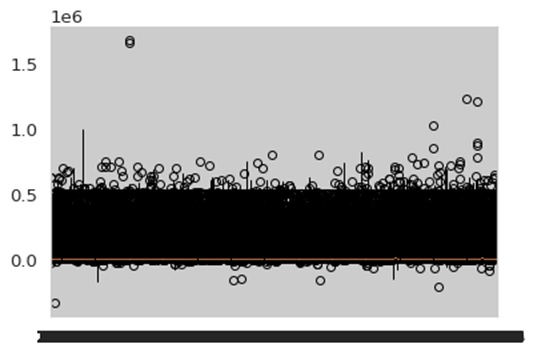

Codigo de la imagen hasta abajo del Notebook
En esta grafica podemos observar que hay outliers, es muy claro que hay 2 puntos aproximadamente en el registro 6000 con creditos que como llegamos a ver en el data set llegan a 1 millon de dolares 1,000,000 USD. Ese tipo de outliers se tratan normalizando el set, como se realiza a continuación.

NORMALIZAR

In [ ]:
from sklearn import preprocessing

Normalizar las variables (24). y aplicar PCA

In [ ]:
dflisto.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(dflisto.dropna(axis=0)))
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.


PCA()

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,2.5598,2.0497,1.2462,1.2144,1.0202,0.9870,0.9569,0.9525,0.9415,0.9335,...,0.7243,0.6308,0.5094,0.4989,0.4345,0.3632,0.2648,0.2019,0.1590,0.1524
Proportion of variance,0.2730,0.1750,0.0647,0.0614,0.0434,0.0406,0.0382,0.0378,0.0369,0.0363,...,0.0219,0.0166,0.0108,0.0104,0.0079,0.0055,0.0029,0.0017,0.0011,0.0010
Cumulative proportion,0.2730,0.4481,0.5128,0.5742,0.6176,0.6582,0.6963,0.7341,0.7711,0.8074,...,0.9422,0.9588,0.9696,0.9800,0.9879,0.9934,0.9963,0.9980,0.9990,1.0000


In [ ]:
pcsSummary_df.iloc[2,15]

0.9588116430203523

In [ ]:
pcsSummary_df.iloc[2,4]

0.6175849498081869

Vemos que necesitamos 14 PC componentes principales para obtener mas del 90% de la variabilidad total

Los primeros CINCO componentes principales acumulan el 61% de la variabilidad total. Por lo que de las 25 variables sería sensaton reducir a mínimo 14 variables. De lo contrario perderiamos mas del 10% de la información.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns=pcsSummary_df.columns,
                                index=dflisto.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
X1,0.065598,0.311654,0.010028,0.076634,-0.198177,-0.267024,-0.261490,0.045703,-0.026711,0.022665,0.019617,0.015884,-0.124429,0.350627,-0.753683
X2,-0.021985,0.030457,0.028071,-0.079480,0.739294,-0.625052,0.007393,0.075174,-0.047962,0.018335,0.021150,-0.016562,0.007602,0.176308,0.113839
X3,0.019823,-0.088486,-0.317659,0.226782,0.451242,0.391056,0.409058,-0.315610,0.053685,-0.156654,0.064666,0.013524,-0.194259,0.064836,-0.374075
X4,-0.005575,-0.039442,0.467603,-0.429091,-0.027033,0.231837,0.189843,-0.120098,0.010383,-0.056852,0.039436,-0.003667,-0.230159,0.643709,0.134507
X5,0.014004,0.062760,-0.477733,0.447243,-0.139402,0.004678,-0.140081,0.048044,0.007461,0.047643,0.009737,-0.017322,-0.093404,0.570823,0.434353
X6,0.164630,-0.296726,-0.020711,0.020438,-0.111303,-0.133971,0.218066,-0.024671,-0.035998,-0.032814,-0.010381,-0.005458,0.511268,0.200999,-0.094790
X7,0.197348,-0.327992,0.018691,0.047993,-0.051945,-0.061264,0.043106,-0.079940,0.004992,-0.034017,0.000985,0.003277,0.398146,0.131849,-0.078995
X8,0.203365,-0.334897,0.063793,0.079836,-0.002505,-0.016452,-0.089191,-0.045382,-0.007855,-0.010996,-0.023988,-0.109547,0.151682,0.078343,-0.081784
X9,0.210039,-0.334391,0.091784,0.103516,0.037295,0.006186,-0.195906,-0.013898,-0.014555,0.045821,-0.050795,0.012207,-0.151645,0.008211,-0.060903
X10,0.213734,-0.321173,0.111814,0.109802,0.054857,0.017113,-0.234663,0.042422,0.013752,0.056402,0.075294,0.040074,-0.304160,-0.053841,-0.023019


In [ ]:
pcsComponents_df.PC1.idxmax()

'X15'

In [ ]:
pcsComponents_df.PC1.nlargest(14)

X15    0.352168
X16    0.350072
X14    0.348044
X13    0.344111
X17    0.342869
X12    0.332711
X10    0.213734
X9     0.210039
X11    0.208880
X8     0.203365
X7     0.197348
X6     0.164630
X18    0.092628
X20    0.084928
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC2.idxmin()

'X8'

In [ ]:
pcsComponents_df.PC2.nsmallest(10)

X8    -0.334897
X9    -0.334391
X7    -0.327992
X10   -0.321173
X6    -0.296726
X11   -0.295759
Y     -0.176545
X3    -0.088486
X4    -0.039442
X2     0.030457
Name: PC2, dtype: float64

**PARTE 1**

Paso 1

Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Se requieren 14 componentes principales (PC) para poder tener mas del 90% de la variabilidad de los datos. Si se consideran 13, se abarcaría el 89%, 14 el 92%.

Si quisieramos considerar el 95% de la variabilidad de los datos, tendríamos que utilizar 16 Componentes Principales (PC)


Paso 2: Interprete cada componente principal en términos de las variables originales

En términos de las variables originales, los coeficientes mas grandes y por lo tanto mas relevantes para la reducción de dimensionalidad utilizando PCA son en orden de magnitud:

X15    0.352168

X16    0.350072

X14    0.348044

X13    0.344111

X17    0.342869

X12    0.332711

X10    0.213734

X9     0.210039

X11    0.208880

X8     0.203365

X7     0.197348

X6     0.164630

X18    0.092628

X20    0.084928

Podemos observar mayor variabilidad en los estados de cuenta o "saldos" del cliente.

Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.





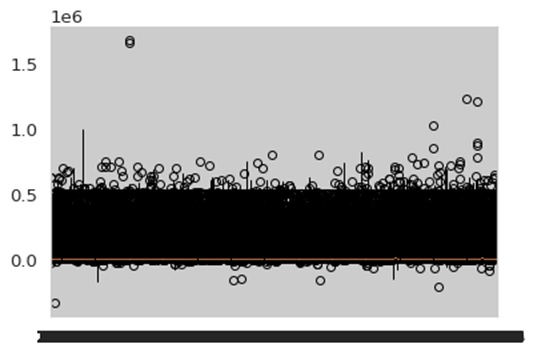

En esta grafica podemos observar que hay outliers, es muy claro que hay 2 puntos aproximadamente en el registro 6000 con creditos que como llegamos a ver en el data set llegan a 1 millon de dolares 1,000,000 USD. Ese tipo de outliers se tratan normalizando el set, como se realizó anteriormente.

**PARTE 2**

1.	¿Cuál es el número de componentes mínimo y por qué?

No se deberían utilizar menos de 14 componentes, con 13 componentes se contemplaría el 89% de variabilidad, con 14 el número sube al 92%.

2.	¿Cuál es la variación de los datos que representan esos componentes?

14 componentes principales representarían el 92%

3.	¿Cuál es la pérdida de información después de realizar PCA?

Al utilizar 14 componentes, la perdida de información sería del 8 %

4.	De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

La variable X15 es la que tiene mayor importancia en los componentes principales (PC), esta variable esta relacionada con el estado de cuenta o “saldo” del cliente

La variable X8 es la que tiene menor importancia en los componentes principales (PC) esta relacionada con el estado de pago o adeudo del cliente en el mes de Julio del 2005

5.	¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Cuando se tienen muchas variables se puede utilizar esta técnica de reducción de dimensionalidad para encontrar las variables mas relevantes mediante la obtención de los coeficientes de los componentes principales. En este caso sabemos de antemano que de 25 variables originales en el data set, si trabajamos con 13 (aproximadamente la mitad) perderíamos solo el 10% de la información asociada a la relevancia en términos de varianza del total de los datos. Esto ayuda a reducir la cantidad de datos, por ende, el tiempo, recursos necesarios en proyectos reales. Finalmente se traduce a una disminución de costo del proyecto.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd739968210>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7fd739968c90>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x7fd739963d50>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x7fd73996f790>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd73996fcd0>,
  ...],
 'means': []}

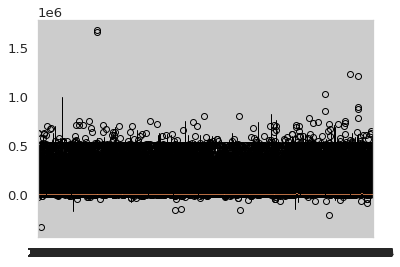

In [ ]:
plt.boxplot(dflisto, notch=None, vert=None, patch_artist=None, widths=None)